# ***Initialization and Loading Data***

In [1]:
# Import Libraries and Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.api as tsa
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import ndiffs, nsdiffs

## Customization Options
# plt.style.use(['fivethirtyeight'])#'seaborn-talk'])#,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)

In [2]:
# Load Dataset
fpath = '/Users/kristansimbulan/Downloads/Crimes_-_2001_to_Present_20240328.csv'
df = pd.read_csv(fpath)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


# ***Data Preparation***

In [3]:
# Convert the 'Date' column to datetime
df1 = df.copy()
df1['Date'] = pd.to_datetime(df['Date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8026833 entries, 0 to 8026832
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  

In [4]:
# Set 'Date' to index
df_dateindex = df1.set_index("Date")
df_dateindex.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-18 12:00:00,11037294,JA371270,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
2018-12-20 15:00:00,11646293,JC213749,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2016-05-01 00:25:00,11645836,JC212333,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2018-12-20 16:00:00,11645959,JC211511,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2014-06-01 00:01:00,11645601,JC212935,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [5]:
# Resample the dataframe
df_res = df_dateindex.groupby('Description').resample('D').sum(numeric_only = True)
df_res.head(10)

ID  Arrest  Domestic  Beat  District  Ward  \
Description    Date                                                          
$300 AND UNDER 2001-05-10  1521929       0         0  1932      19.0   0.0   
               2001-05-11        0       0         0     0       0.0   0.0   
               2001-05-12        0       0         0     0       0.0   0.0   
               2001-05-13        0       0         0     0       0.0   0.0   
               2001-05-14        0       0         0     0       0.0   0.0   
               2001-05-15        0       0         0     0       0.0   0.0   
               2001-05-16        0       0         0     0       0.0   0.0   
               2001-05-17        0       0         0     0       0.0   0.0   
               2001-05-18        0       0         0     0       0.0   0.0   
               2001-05-19        0       0         0     0       0.0   0.0   

                           Community Area  X Coordinate  Y Coordinate  Year  \
Description    Date                                                           
$300 AND UNDER 2001-05-10             0.0     1170123.0     1921138.0  2001   
               2001-05-11             0.0           0.0           0.0     0   
               2001-05-12             0.0           0.0           0.0     0   
               2001-05-13             0.0           0.0           0.0     0   
               2001-05-14             0.0           0.0           0.0     0   
               2001-05-15             0.0           0.0           0.0     0   
               2001-05-16             0.0           0.0           0.0     0   
               2001-05-17             0.0           0.0           0.0     0   
               2001-05-18             0.0           0.0           0.0     0   
               2001-05-19             0.0           0.0           0.0     0   

                            Latitude  Longitude  
Description    Date                              
$300 AND UNDER 2001-05-10  41.939099 -87.650159  
               2001-05-11   0.000000   0.000000  
               2001-05-12   0.000000   0.000000  
               2001-05-13   0.000000   0.000000  
               2001-05-14   0.000000   0.000000  
               2001-05-15   0.000000   0.000000  
               2001-05-16   0.000000   0.000000  
               2001-05-17   0.000000   0.000000  
               2001-05-18   0.000000   0.000000  
               2001-05-19   0.000000   0.000000

# ***Exploratory Data Analysis***

### 1) Comparing Police Districts: Which district had the most crimes in 2022? Which had the least?

In [6]:
# Resample the dataframe
df_res_1 = df_dateindex.groupby('District').resample('Y').size().copy()

Text(0.5, 0, 'Number of Crimes')

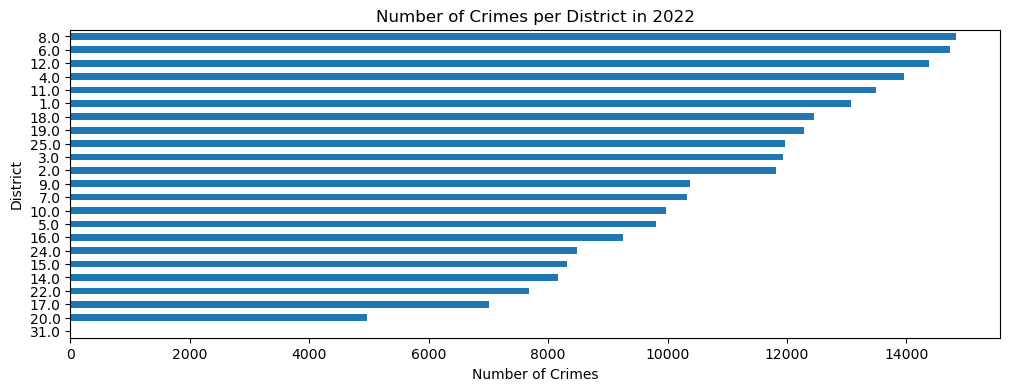

In [7]:
# Check the district with the most and least crimes in 2022
ax1 = df_res_1.loc[: ,'2022'].sort_values().plot(kind = 'barh')
ax1.set_title('Number of Crimes per District in 2022')
ax1.set_xlabel('Number of Crimes')

- ***District 31 has the least number of crimes, while District 8 has the most number.***

### 2) Crimes across the years: Is the total number of crimes increasing or decreasing across the years? Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

In [8]:
# Resample the dataframe
df_res_20 = df_dateindex.resample('Y').size().copy()

Text(0, 0.5, 'Number of crimes')

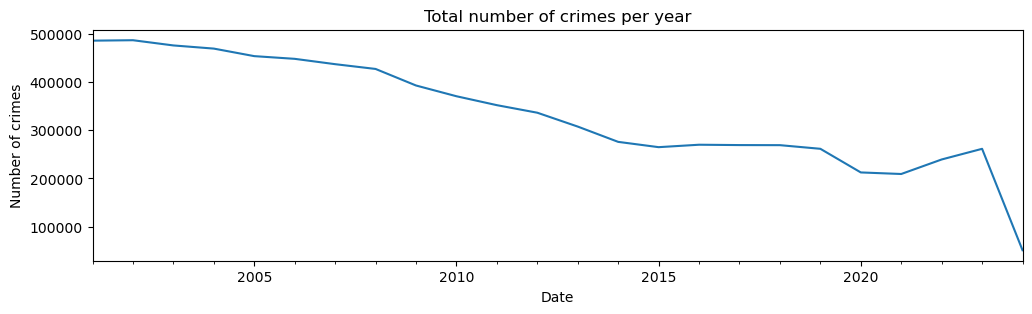

In [9]:
# Plot the total crimes per year
ax20 = df_res_20.plot(figsize = (12, 3))
ax20.set_title('Total number of crimes per year')
ax20.set_ylabel('Number of crimes')

- ***Overall, the number of crimes are decreasing year after year.***

In [10]:
# Resample the dataframe
df_res_21 = df_dateindex.groupby('Primary Type').resample('Y').size().copy()

In [11]:
df_res_21

Primary Type       Date      
ARSON              2001-12-31    1011
                   2002-12-31    1032
                   2003-12-31     955
                   2004-12-31     778
                   2005-12-31     691
                                 ... 
WEAPONS VIOLATION  2020-12-31    8432
                   2021-12-31    8978
                   2022-12-31    8780
                   2023-12-31    8605
                   2024-12-31    1652
Length: 783, dtype: int64

In [12]:
# Unstack 'Primary Type' so we can plot all features at once
unstacked_21 = df_res_21.unstack(level=0).copy()
unstacked_21.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2001-12-31,1011.0,31385.0,93464.0,26014.0,1.0,1776.0,55862.0,36.0,13241.0,14950.0,...,29664.0,6026.0,9.0,2750.0,8.0,18441.0,2238.0,204.0,99280.0,4278.0
2002-12-31,1032.0,31523.0,94153.0,25623.0,0.0,1804.0,55941.0,32.0,13880.0,13734.0,...,32601.0,6408.0,8.0,2457.0,2.0,18523.0,2173.0,200.0,98334.0,4281.0
2003-12-31,955.0,29477.0,88380.0,25157.0,0.0,1570.0,55011.0,43.0,14807.0,13460.0,...,31148.0,6214.0,6.0,2430.0,2.0,17332.0,2078.0,247.0,98876.0,4211.0
2004-12-31,778.0,28850.0,87136.0,24564.0,0.0,1535.0,53164.0,45.0,15913.0,13257.0,...,29533.0,7476.0,9.0,2495.0,1.0,15978.0,1805.0,215.0,95464.0,4298.0
2005-12-31,691.0,27067.0,83964.0,25503.0,0.0,1517.0,54548.0,41.0,16655.0,13592.0,...,28028.0,6124.0,4.0,2730.0,2.0,16047.0,1817.0,192.0,85684.0,4106.0


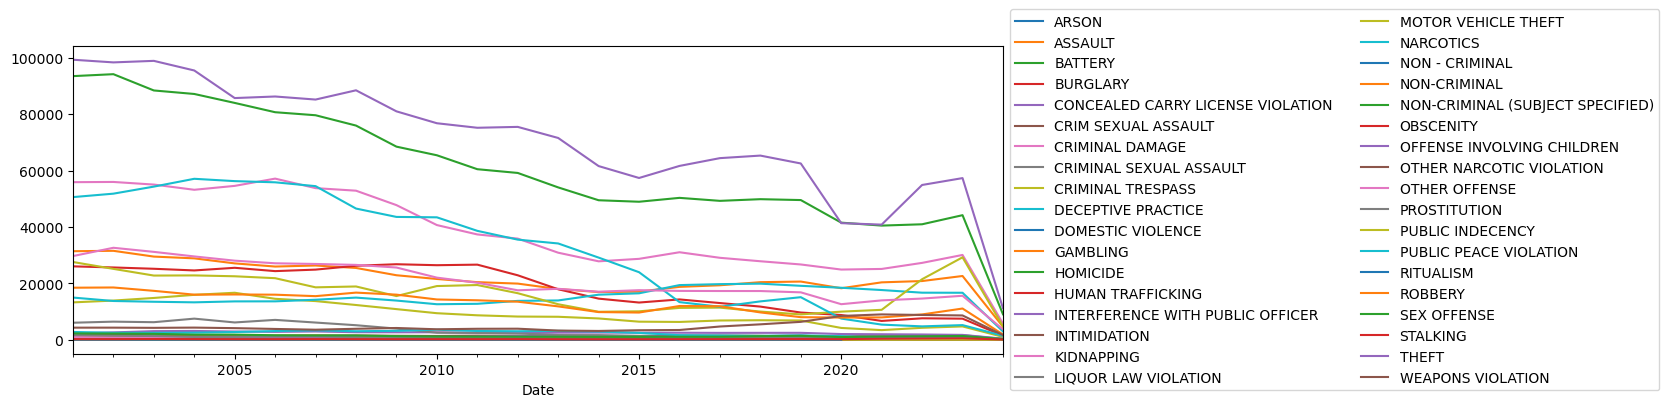

In [13]:
# Plot
ax21 = unstacked_21.plot()
# Put the legend to the right of the current axis
ax21.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 2)

- ***All types of crimes generally decreased from 2001 to 2024.***

### 3) Comparing Months: ​What months have the most crime? What months have the least?

In [14]:
# Regroup the dataframe
df_temp = df_dateindex.copy()
df_temp['Month'] = df_dateindex.index.month_name()
df_res_30 = df_temp.groupby('Month').size().copy()

Text(0, 0.5, 'Number of Crimes')

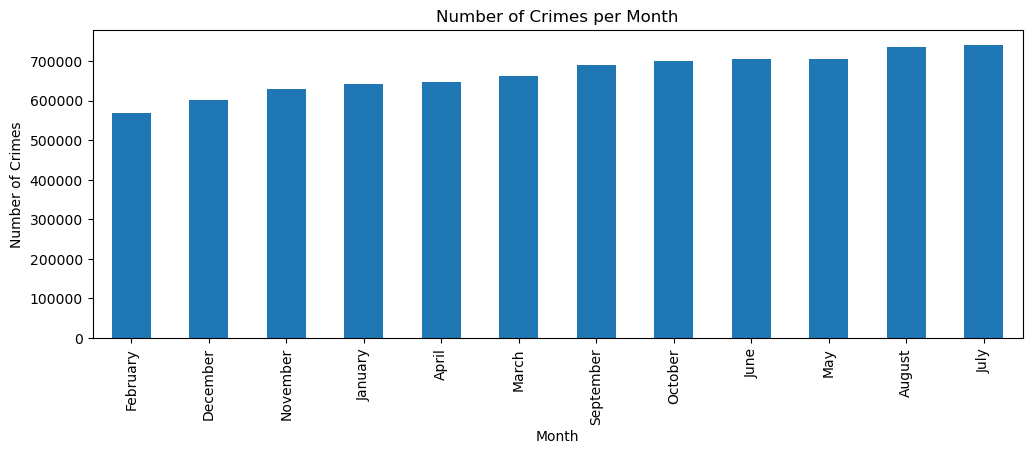

In [15]:
# Plot
ax30 = df_res_30.sort_values().plot(kind = 'bar')
ax30.set_title('Number of Crimes per Month')
ax30.set_ylabel('Number of Crimes')

- ***The month of February has the least number of crimes, while July has the most number.***

In [16]:
# Regroup the dataframe
df_res_31 = df_temp.groupby(['Primary Type', 'Month']).size().copy()

In [17]:
df_res_31

Primary Type       Month    
ARSON              April         1134
                   August        1216
                   December       971
                   February       870
                   January       1006
                                ...  
WEAPONS VIOLATION  March         9207
                   May          10757
                   November      8607
                   October       9869
                   September    10157
Length: 415, dtype: int64

In [18]:
# Unstack 'Primary Type' so we can plot all features at once
unstacked_31 = df_res_31.unstack(level=0).copy()
unstacked_31.head(12)

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Month,,,,,,,,,,,,,,,,,,,,,
April,1134.0,43843.0,122115.0,31970.0,90.0,2126.0,77539.0,572.0,18099.0,29269.0,...,42867.0,6039.0,13.0,4423.0,1.0,21661.0,2379.0,433.0,130012.0,9096.0
August,1216.0,48575.0,132793.0,41247.0,119.0,2586.0,84470.0,753.0,18971.0,30754.0,...,42397.0,6297.0,25.0,4486.0,3.0,28609.0,3030.0,452.0,164359.0,10690.0
December,971.0,36110.0,101891.0,36256.0,83.0,1844.0,65578.0,590.0,16185.0,31337.0,...,36398.0,4356.0,15.0,3248.0,3.0,26745.0,2028.0,369.0,131679.0,7955.0
February,870.0,36635.0,100112.0,26724.0,92.0,1890.0,59533.0,669.0,17442.0,27964.0,...,41221.0,5700.0,17.0,3545.0,1.0,18527.0,2215.0,367.0,113016.0,7684.0
January,1006.0,38235.0,107754.0,33865.0,97.0,2571.0,67065.0,805.0,19235.0,33107.0,...,44891.0,6454.0,8.0,3598.0,3.0,25034.0,2922.0,459.0,132096.0,9293.0
July,1395.0,49948.0,141032.0,39914.0,116.0,2671.0,86361.0,781.0,18425.0,29993.0,...,42907.0,5900.0,13.0,4785.0,1.0,28250.0,3195.0,489.0,164249.0,10670.0
June,1285.0,49291.0,139785.0,36558.0,111.0,2502.0,81562.0,757.0,17856.0,29710.0,...,42016.0,5601.0,22.0,5053.0,NaN,25190.0,3034.0,454.0,148500.0,10191.0
March,1160.0,44635.0,123576.0,30999.0,101.0,2108.0,75650.0,693.0,19422.0,30882.0,...,45465.0,6163.0,9.0,4793.0,3.0,21332.0,2528.0,467.0,130815.0,9207.0
May,1285.0,50472.0,139640.0,36675.0,105.0,2397.0,82275.0,697.0,18768.0,29018.0,...,43474.0,6094.0,24.0,5576.0,1.0,24482.0,2935.0,434.0,142244.0,10757.0


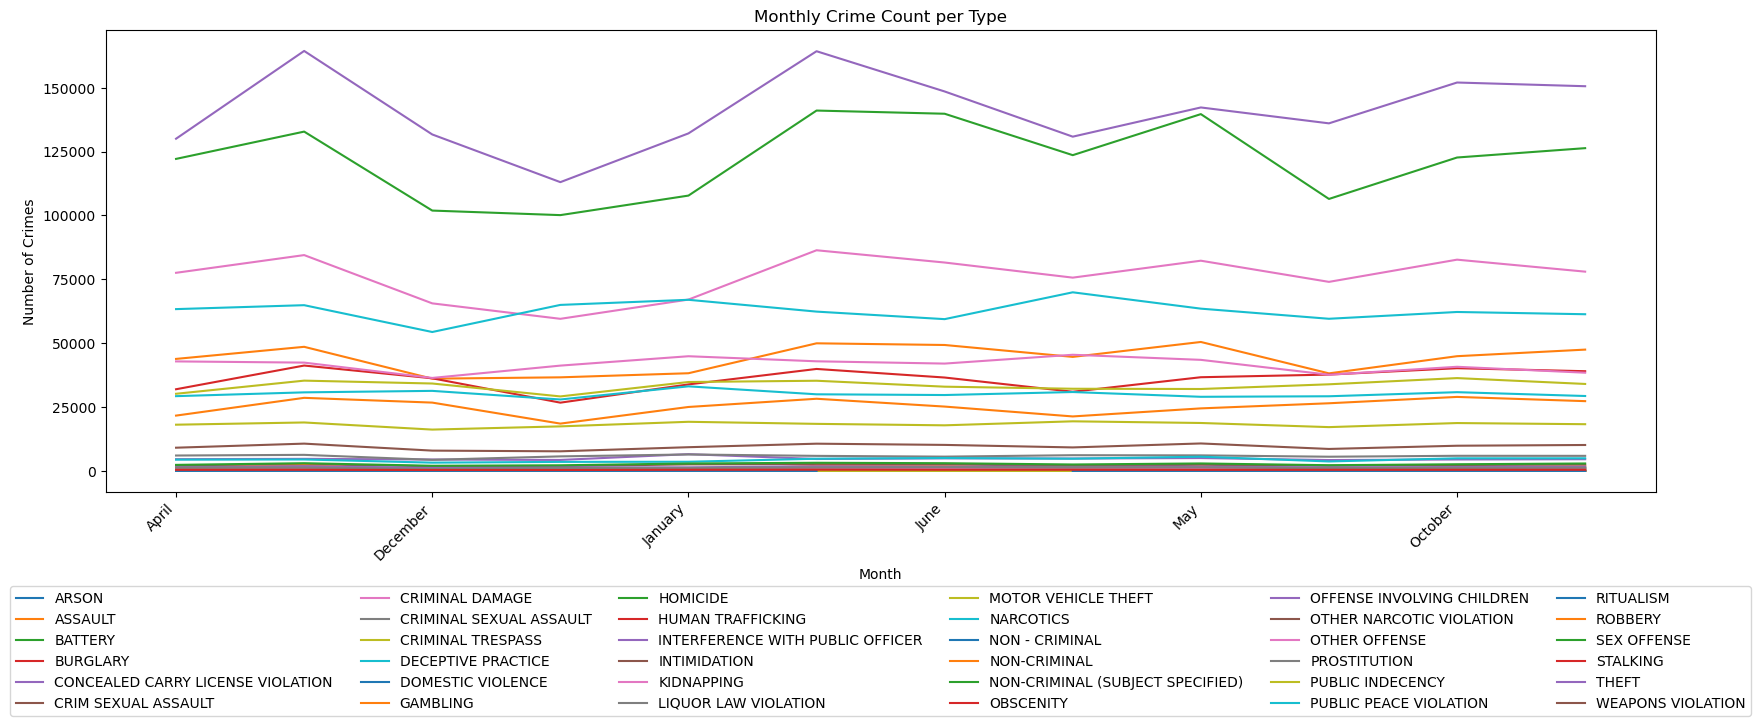

In [19]:
# Plot
ax31 = unstacked_31.plot(figsize = (20, 6))
# Put the legend to the right of the current axis
ax31.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol = 6);
ax31.set_title('Monthly Crime Count per Type')
ax31.set_ylabel('Number of Crimes')
ax31.set_xticklabels(ax31.get_xticklabels(), rotation=45, ha='right');

- ***In most crime types, the month of February still has the least number of crimes, while July still has the most number.***

# ***Forecasting theft and narcotics occurences 6 months into the future***

## Define functions

In [20]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [21]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)
    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')
    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )
    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)
    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")
        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 
        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")
    fig.tight_layout()
    
    return fig

In [22]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)
            
    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();
    
    return fig, ax

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

## Prepare Dataframe

In [24]:
# Display dataframe
df_dateindex.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-18 12:00:00,11037294,JA371270,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
2018-12-20 15:00:00,11646293,JC213749,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2016-05-01 00:25:00,11645836,JC212333,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2018-12-20 16:00:00,11645959,JC211511,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2014-06-01 00:01:00,11645601,JC212935,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [25]:
# Select only the required columns
df_dateindex_f = df_dateindex[df_dateindex['Primary Type'].isin(['THEFT', 'NARCOTICS'])].copy()
df_dateindex_f.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-01 00:01:00,11646166,JC213529,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2020-05-07 10:24:00,12045583,JD226426,035XX S INDIANA AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,212,...,3.0,35.0,06,1178180.0,1881621.0,2020,05/14/2020 08:47:15 AM,41.830482,-87.621752,"(41.830481843, -87.621751752)"
2019-03-31 09:30:00,11641644,JC207234,005XX N ogden ave,0890,THEFT,FROM BUILDING,RESTAURANT,False,False,1215,...,1.0,24.0,06,NaN,NaN,2019,04/07/2019 04:05:59 PM,NaN,NaN,NaN
2019-03-31 11:00:00,11642709,JC208560,0000X E MONROE ST,0890,THEFT,FROM BUILDING,HOTEL/MOTEL,False,False,112,...,42.0,32.0,06,NaN,NaN,2019,04/07/2019 04:05:59 PM,NaN,NaN,NaN
2019-03-31 01:00:00,11642710,JC209088,015XX N WELLS ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,1821,...,27.0,8.0,06,NaN,NaN,2019,04/07/2019 04:05:59 PM,NaN,NaN,NaN


In [26]:
# Resample the dataframe
df_frcst = df_dateindex_f.groupby('Primary Type').resample('M').size().copy()
df_frcst = df_frcst.transpose()

In [27]:
df_frcst

Primary Type,NARCOTICS,THEFT
Date,,
2001-01-31,4714,7867
2001-02-28,4369,6669
2001-03-31,4862,7766
2001-04-30,4044,7702
2001-05-31,4038,8420
...,...,...
2023-11-30,486,4776
2023-12-31,437,5020
2024-01-31,517,4326


In [28]:
# Check for null values
df_frcst.isna().sum()

Primary Type
NARCOTICS    0
THEFT        0
dtype: int64

## Forecasting

### NARCOTICS feature

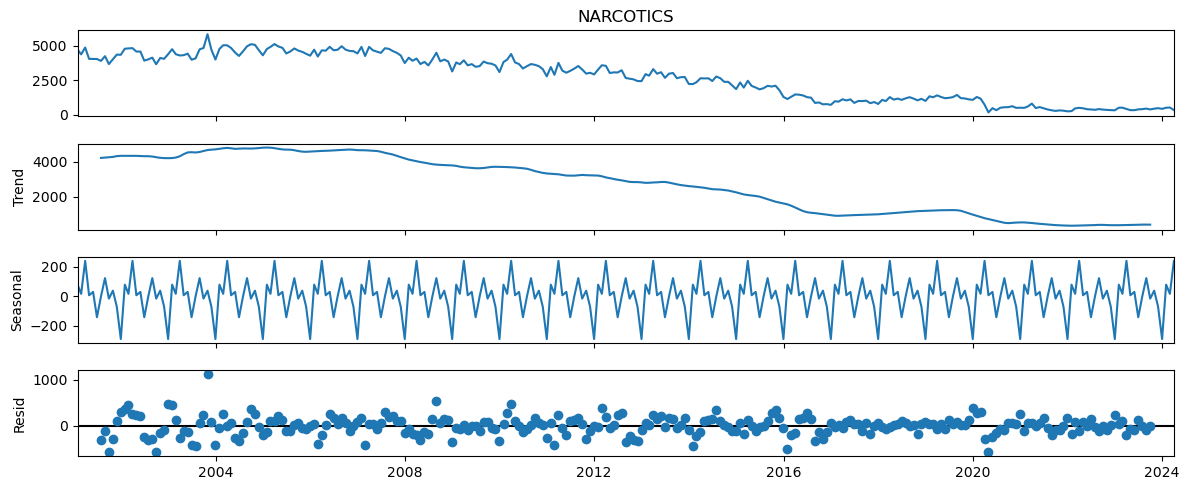

In [29]:
# Apply seasonal decomposition for NARCOTICS
decomp_narc = tsa.seasonal_decompose(df_frcst['NARCOTICS'])
fig = decomp_narc.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

In [30]:
# How big is the seasonal component
seasonal_delta_narc = decomp_narc.seasonal.max() - decomp_narc.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta_narc} which is ~{seasonal_delta_narc/(df_frcst['NARCOTICS'].max()-df_frcst['NARCOTICS'].min())*100:.2f}% of the variation in time series.")

The seasonal component is 529.7386363636365 which is ~9.39% of the variation in time series.


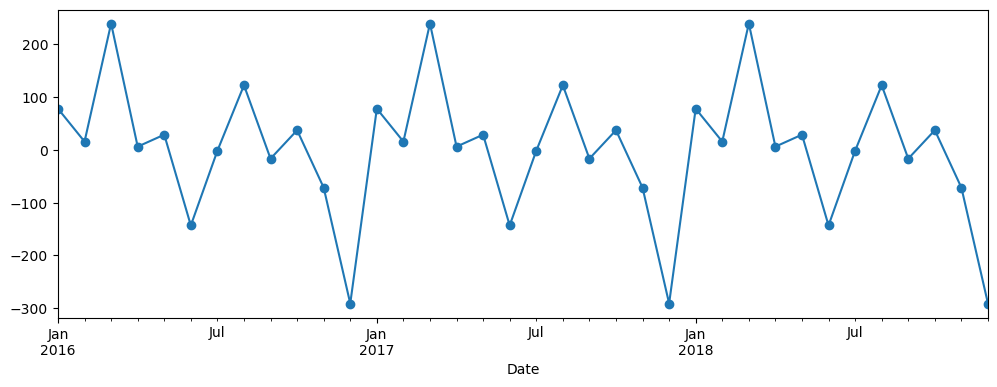

In [31]:
# Narrow down the date range of the plot
seasonal_narc = decomp_narc.seasonal
ax = seasonal_narc.loc['2016': '2018'].plot(marker = 'o')

In [32]:
# Check for stationarity
get_adfuller_results(df_frcst['NARCOTICS'])

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-0.025481,12,266,0.956373,0.05,False


In [33]:
# check for nonseasonal differencing
ndiffs(df_frcst['NARCOTICS'])

1

In [34]:
# check for seasonal differencing
nsdiffs(df_frcst['NARCOTICS'], m = 12)

0

In [35]:
# Nonseasonal difference once (d = 1)
ts_diff_narc = df_frcst['NARCOTICS'].diff().dropna()

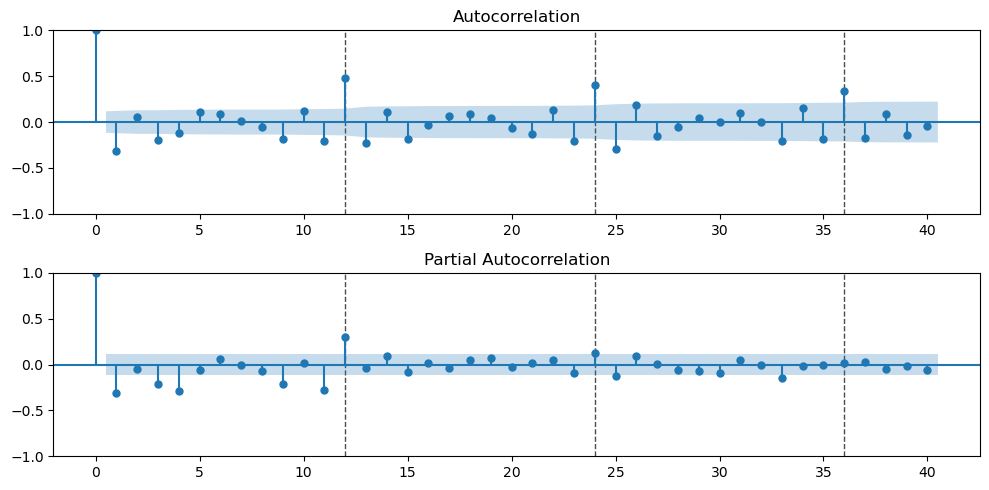

In [36]:
# Plot acf and pacf; highlight the seasonal lags
plot_acf_pacf(ts_diff_narc, annotate_seas=True, m = 12);

Text(0.5, 1.0, 'Number of Narcotics Crimes from 2000 to 2024')

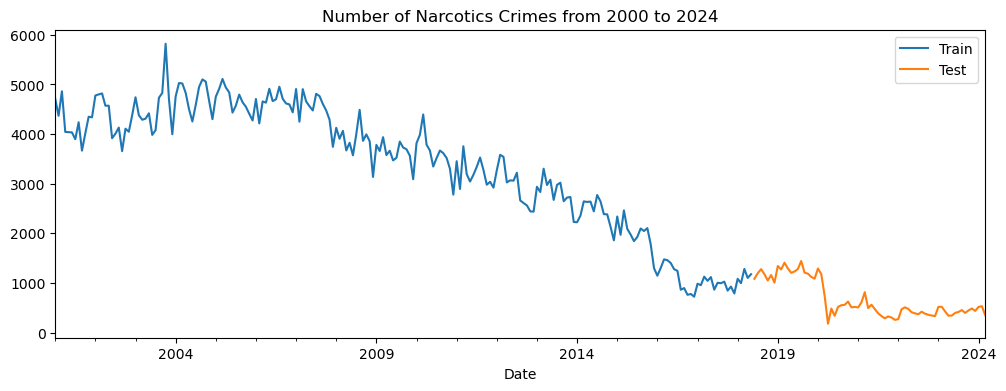

In [37]:
# Train Test Split
train_narc, test_narc = train_test_split(df_frcst['NARCOTICS'], test_size=.25)
ax1 = train_narc.plot(label='Train')
test_narc.plot(ax=ax1, label='Test')
ax1.legend();
ax1.set_title('Number of Narcotics Crimes from 2000 to 2024')

In [38]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

sarima_narc = tsa.ARIMA(train_narc, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

In [39]:
# Obtain summary
sarima_narc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                        NARCOTICS   No. Observations:                  209
Model:             ARIMA(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1440.526
Date:                          Sun, 07 Apr 2024   AIC                           2891.052
Time:                                  13:27:16   BIC                           2907.740
Sample:                              01-31-2001   HQIC                          2897.800
                                   - 05-31-2018                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5357      0.093      5.786      0.000       0.354       0.717
ma.L1         -0.8426      0.069    -12.224      0.000      -0.978      -0.707
ar.S.L12       0.9508      0.032     29.794      0.000       0.888       1.013
ma.S.L12      -0.7336      0.093     -7.924      0.000      -0.915      -0.552
sigma2       5.88e+04   4505.539     13.050      0.000       5e+04    6.76e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                22.54
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

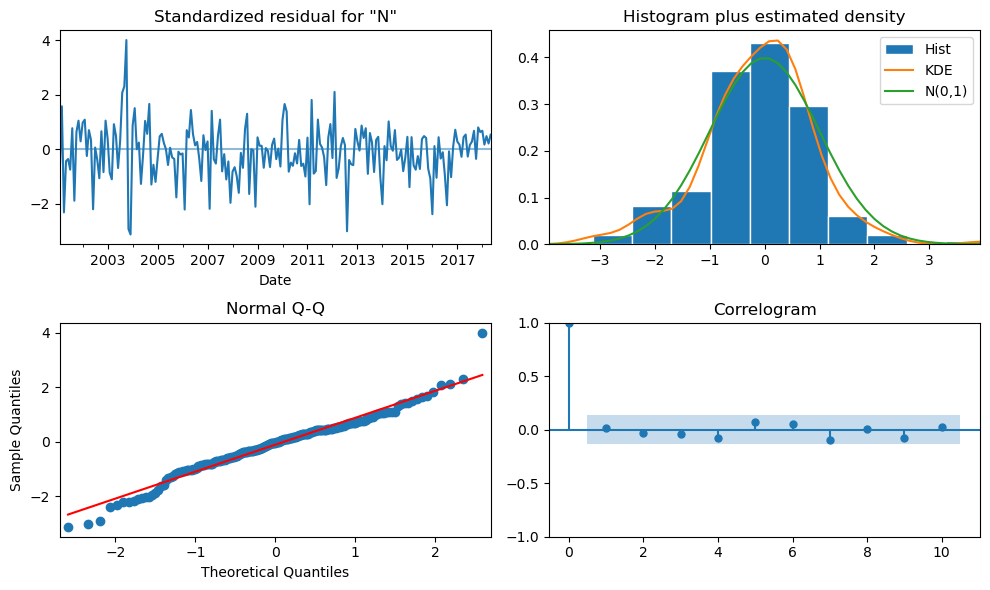

In [40]:
# Obtain diagnostic plots
fig2 = sarima_narc.plot_diagnostics()
fig2.set_size_inches(10,6)
fig2.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 386.095
- MSE = 195,522.090
- RMSE = 442.179
- R^2 = -0.414
- MAPE = 70.16%


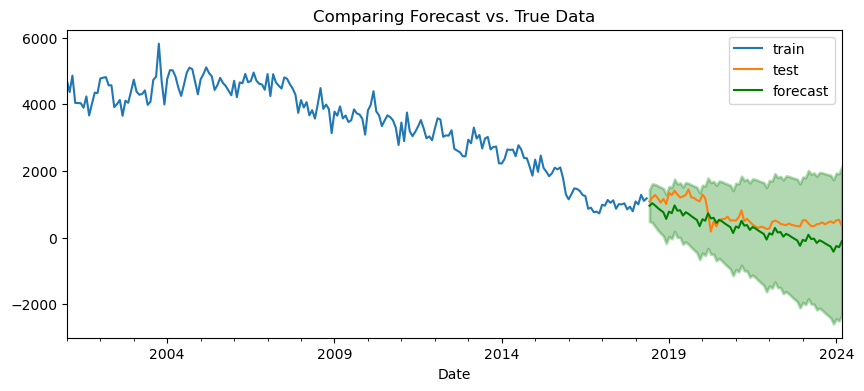

In [41]:
# Obtain summary of forecast as dataframe
forecast_df_narc = sarima_narc.get_forecast(len(test_narc)).summary_frame()
# Plot the forecast with true values
plot_forecast(train_narc, test_narc, forecast_df_narc)
# Obtain metrics
regression_metrics_ts(test_narc, forecast_df_narc["mean"])

- High MAPE, try auto_arima

- ***Use AUTO_ARIMA***

In [42]:
# auto_arima to select model based on AIC score
auto_model_narc = pm.auto_arima(
    train_narc,
    seasonal=True,  
    m=12,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3002.575, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2930.310, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2939.622, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3001.138, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2980.446, Time=0.01 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=2924.331, Time=0.64 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2909.166, Time=0.28 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2946.957, Time=0.10 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=2935.873, Time=0.33 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.48 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2914.504, Time=0.26 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : 

In [43]:
# auto_arima to store the best nonseasonal and seasonal orders separately
print(auto_model_narc.order)
print(auto_model_narc.seasonal_order)

(1, 1, 1)
(1, 0, 1, 12)


In [44]:
# Obtain summary of the best model from auto_arima
auto_model_narc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  209
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1440.526
Date:                            Sun, 07 Apr 2024   AIC                           2891.052
Time:                                    13:28:20   BIC                           2907.740
Sample:                                01-31-2001   HQIC                          2897.800
                                     - 05-31-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5357      0.093      5.786      0.000       0.354       0.717
ma.L1         -0.8426      0.069    -12.224      0.000      -0.978      -0.707
ar.S.L12       0.9508      0.032     29.794      0.000       0.888       1.013
ma.S.L12      -0.7336      0.093     -7.924      0.000      -0.915      -0.552
sigma2       5.88e+04   4505.539     13.050      0.000       5e+04    6.76e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                22.54
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

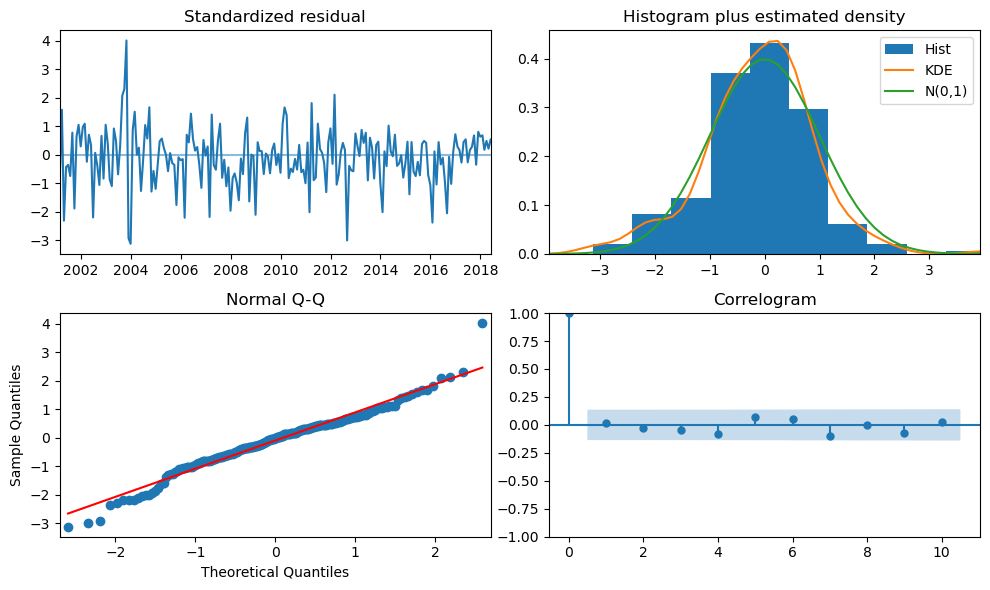

In [45]:
# Obtain diagnostic plots
fig3 = auto_model_narc.plot_diagnostics()
fig3.set_size_inches(10,6)
fig3.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 386.095
- MSE = 195,522.090
- RMSE = 442.179
- R^2 = -0.414
- MAPE = 70.16%


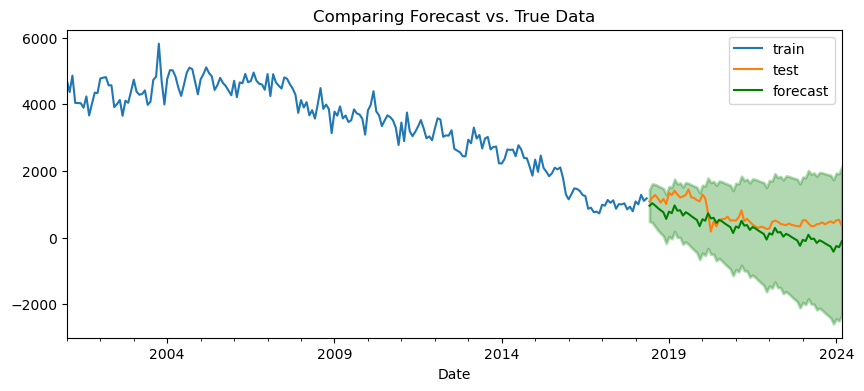

In [46]:
# Use auto_arima parameters to fit an ARIMA
auto_model_narc = tsa.ARIMA(
    train_narc, order=auto_model_narc.order, seasonal_order=auto_model_narc.seasonal_order).fit()

# Obtain forecast as a dataframe with confidence intervals
forecast_df_narc_auto = auto_model_narc.get_forecast(steps=len(test_narc)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train_narc, test_narc, forecast_df_narc_auto);
# Obtain metrics
regression_metrics_ts(test_narc, forecast_df_narc_auto['mean'])

In [47]:
# These are the parameters of our final model
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

final_model_narc = tsa.ARIMA(df_frcst['NARCOTICS'], order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

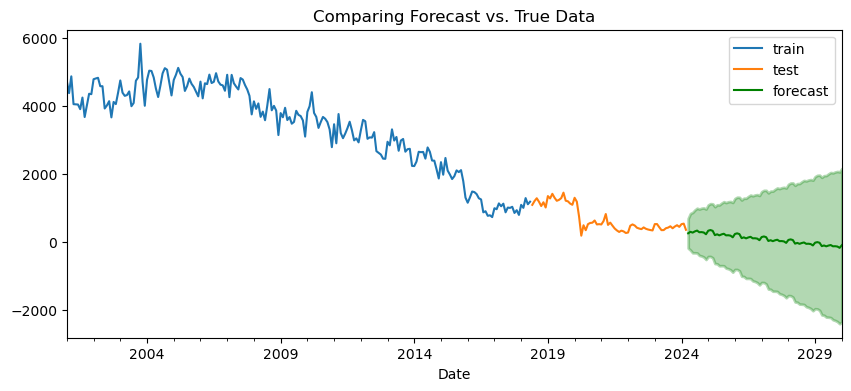

In [49]:
# Obtain future forecasts beyond test data
forecast_df_narc = final_model_narc.get_forecast(len(test_narc)).summary_frame()
plot_forecast(train_narc,test_narc,forecast_df_narc);

In [50]:
# Summarize the forecast

starting_value_narc = forecast_df_narc['mean'].iloc[0]
final_value_narc = forecast_df_narc['mean'].iloc[-1]
change_narc = final_value_narc - starting_value_narc
change_narc

-350.8857221721649

- An decrease of ~350 cases were recorded from 2000 to 2023 and estimated from then until 2029

In [51]:
perc_change_narc = (change_narc / starting_value_narc) * 100
perc_change_narc

-141.23979365591782

- There is a 141.24% decrease in the number of narcotics cases from 01/2000 to 09/2023 and estimated from then until 2029

***OBSERVATIONS:***
- The best model as suggested by auto_arima has been used.
- However, a large error still exists to date.
- Looking at the forecast charts, the trend of the forecast makes sense considering the trend of the original data

### THEFT feature

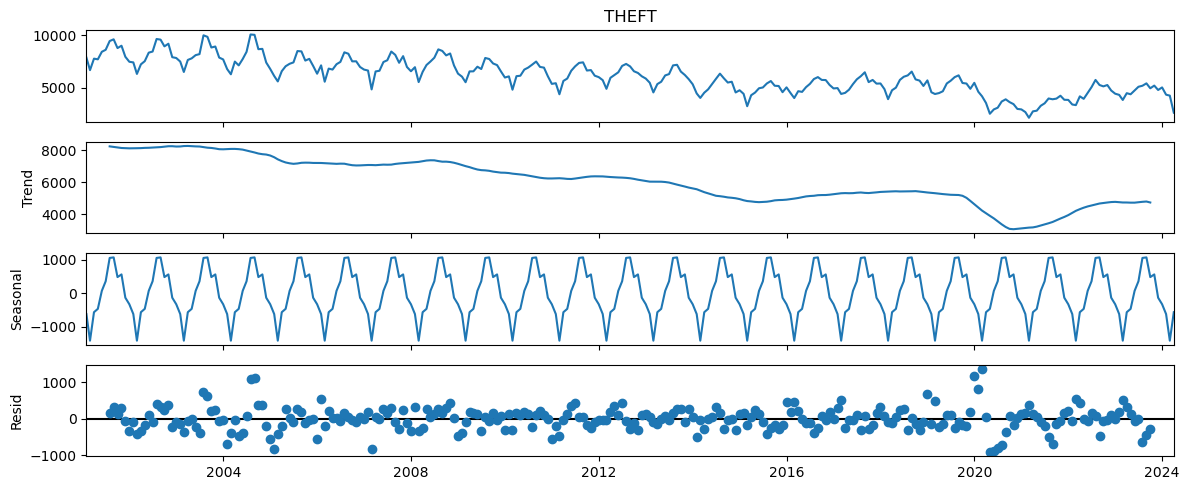

In [52]:
# Apply seasonal decomposition for THEFT
decomp_theft = tsa.seasonal_decompose(df_frcst['THEFT'])
fig4 = decomp_theft.plot()
fig4.set_size_inches(12,5)
fig4.tight_layout()

In [53]:
# How big is the seasonal component
seasonal_delta_theft = decomp_theft.seasonal.max() - decomp_theft.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta_theft} which is ~{seasonal_delta_theft/(df_frcst['THEFT'].max()-df_frcst['THEFT'].min())*100:.2f}% of the variation in time series.")

The seasonal component is 2481.475708168643 which is ~31.23% of the variation in time series.


- consider seasonal for both features

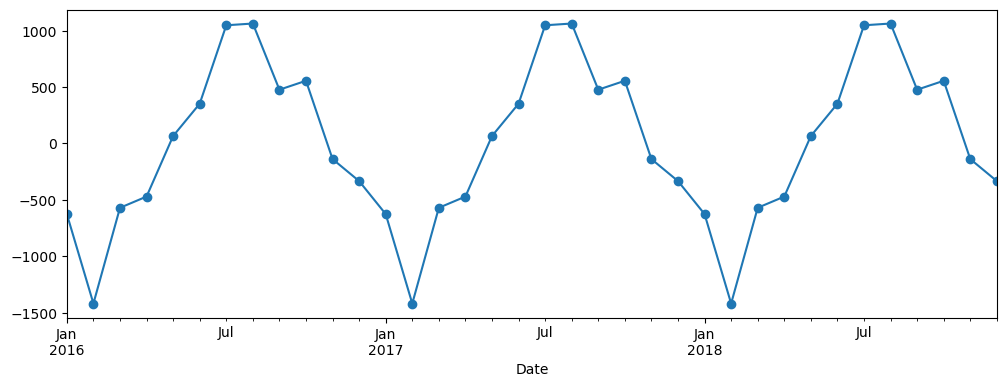

In [54]:
# Narrow down the date range of the plot
seasonal_theft = decomp_theft.seasonal
ax2 = seasonal_theft.loc['2016': '2018'].plot(marker = 'o')

In [55]:
# Check for stationarity
get_adfuller_results(df_frcst['THEFT'])

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-1.050421,13,265,0.734433,0.05,False


In [56]:
# check for nonseasonal differencing
ndiffs(df_frcst['THEFT'])

1

In [57]:
# check for seasonal differencing
nsdiffs(df_frcst['THEFT'], m=12)

0

In [58]:
# Nonseasonal difference once (d = 1)
ts_diff_theft = df_frcst['THEFT'].diff().dropna()

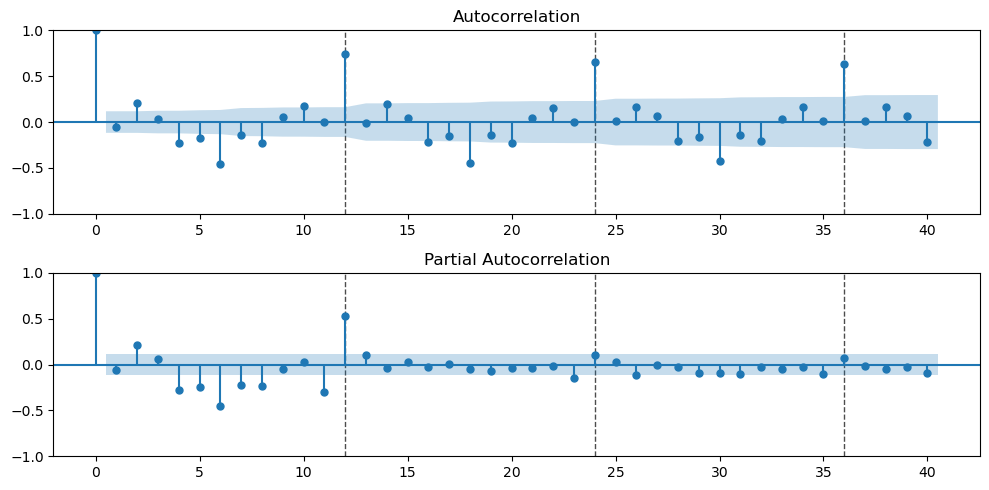

In [59]:
# Plot acf and pacf; highlight the seasonal lags
plot_acf_pacf(ts_diff_theft, annotate_seas=True, m = 12);

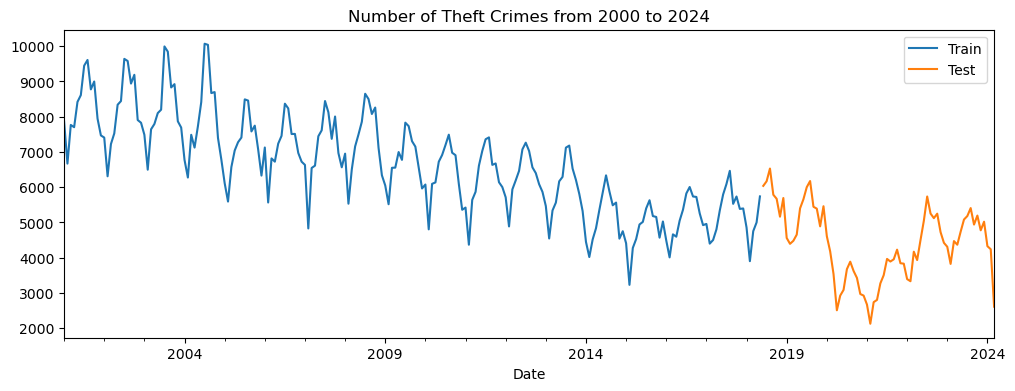

In [60]:
# Train Test Split
train_theft, test_theft = train_test_split(df_frcst['THEFT'], test_size=.25)
ax3 = train_theft.plot(label='Train')
test_theft.plot(ax=ax3, label='Test')
ax3.legend();
ax3.set_title('Number of Theft Crimes from 2000 to 2024');

In [61]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 0  # Seasonal MA
m = 12 # Seasonal period

sarima_theft = tsa.ARIMA(train_theft, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

In [62]:
# Obtain summary
sarima_theft.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             THEFT   No. Observations:                  209
Model:             ARIMA(1, 1, 1)x(1, 0, [], 12)   Log Likelihood               -1535.987
Date:                           Sun, 07 Apr 2024   AIC                           3079.974
Time:                                   13:30:38   BIC                           3093.324
Sample:                               01-31-2001   HQIC                          3085.372
                                    - 05-31-2018                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9607      0.180     -5.330      0.000      -1.314      -0.607
ma.L1          0.9683      0.159      6.086      0.000       0.656       1.280
ar.S.L12       0.8034      0.029     27.502      0.000       0.746       0.861
sigma2      1.329e+05   1.18e+04     11.282      0.000     1.1e+05    1.56e+05
===================================================================================
Ljung-Box (L1) (Q):                  14.76   Jarque-Bera (JB):                 1.91
Prob(Q):                              0.00   Prob(JB):                         0.38
Heteroskedasticity (H):               0.67   Skew:                            -0.06
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

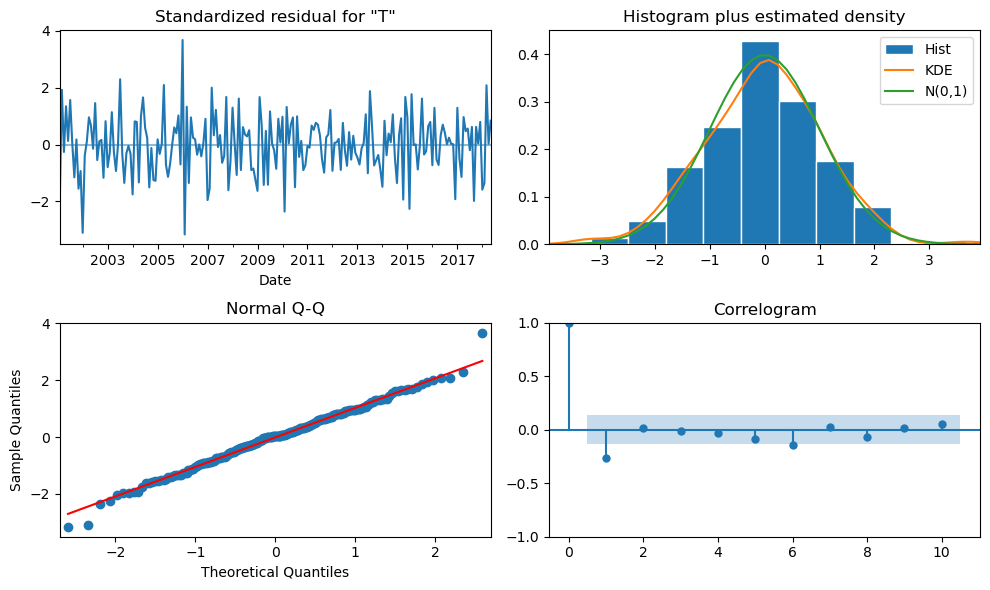

In [63]:
# Obtain diagnostic plots
fig5 = sarima_theft.plot_diagnostics()
fig5.set_size_inches(10,6)
fig5.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 1,954.427
- MSE = 4,960,049.480
- RMSE = 2,227.117
- R^2 = -3.712
- MAPE = 52.94%


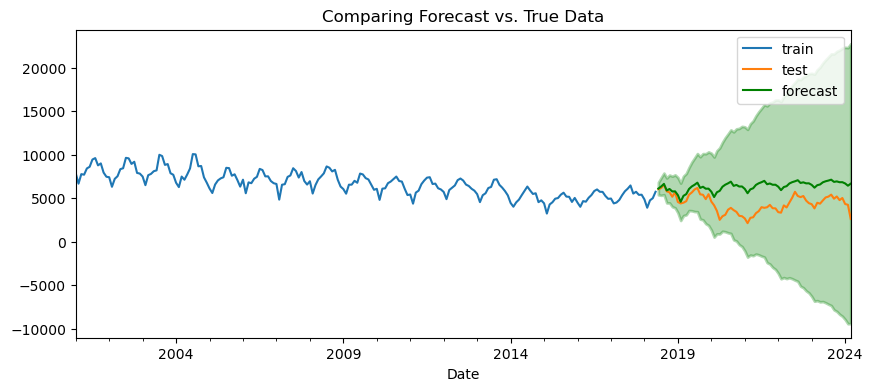

In [64]:
# Obtain summary of forecast as dataframe
forecast_df_theft = sarima_theft.get_forecast(len(test_theft)).summary_frame()
# Plot the forecast with true values
plot_forecast(train_theft, test_theft, forecast_df_theft)
# Obtain metrics
regression_metrics_ts(test_theft, forecast_df_theft["mean"])

- High MAPE, consider using auto_arima

- ***Use AUTO_ARIMA***

In [65]:
# auto_arima to select model based on AIC score
auto_model_theft = pm.auto_arima(
    train_theft,
    seasonal=True,  
    m=12,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3299.914, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3060.854, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3186.062, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3297.965, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3299.971, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3015.687, Time=0.28 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3185.002, Time=0.13 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.41 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3015.663, Time=0.91 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3140.749, Time=0.61 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=3034.843, Time=0.87 sec
 ARIMA(2,1,0)(1,0,2)[12] intercept   : 

In [66]:
# auto_arima to store the best nonseasonal and seasonal orders separately
print(auto_model_theft.order)
print(auto_model_theft.seasonal_order)

(2, 1, 0)
(1, 0, 2, 12)


In [67]:
# Obtain summary of the best model from auto_arima
auto_model_theft.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  209
Model:             SARIMAX(2, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1500.714
Date:                                 Sun, 07 Apr 2024   AIC                           3013.427
Time:                                         13:31:20   BIC                           3033.452
Sample:                                     01-31-2001   HQIC                          3021.524
                                          - 05-31-2018                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3402      0.067     -5.060      0.000      -0.472      -0.208
ar.L2         -0.1105      0.063     -1.760      0.078      -0.234       0.013
ar.S.L12       0.9863      0.007    142.796      0.000       0.973       1.000
ma.S.L12      -0.6056      0.075     -8.035      0.000      -0.753      -0.458
ma.S.L24      -0.1164      0.084     -1.383      0.167      -0.281       0.049
sigma2      8.875e+04   8347.591     10.632      0.000    7.24e+04    1.05e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.46
Prob(Q):                              0.98   Prob(JB):                         0.11
Heteroskedasticity (H):               0.53   Skew:                            -0.10
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

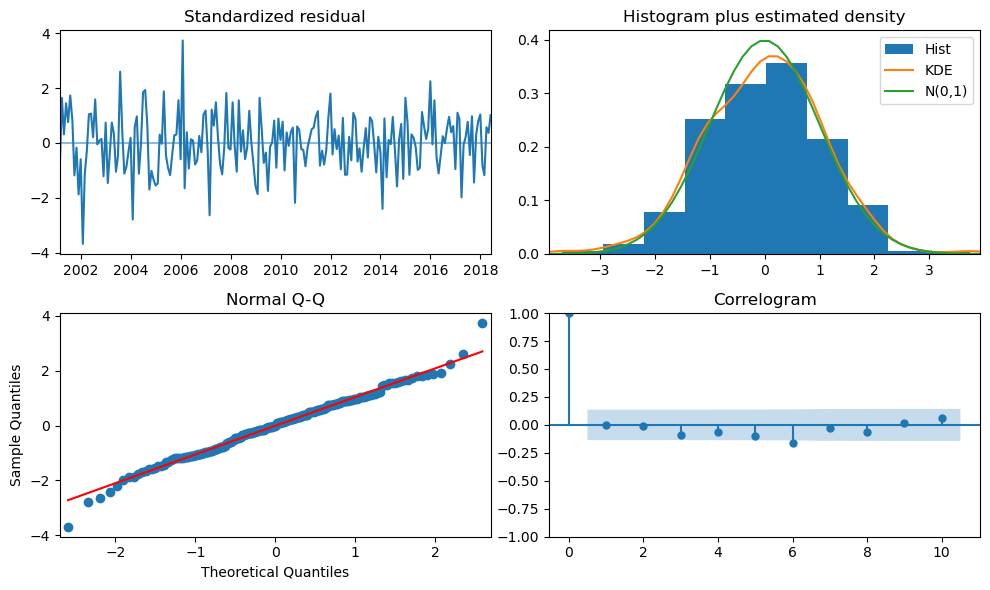

In [68]:
# Obtain diagnostic plots
fig6 = auto_model_theft.plot_diagnostics()
fig6.set_size_inches(10,6)
fig6.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 1,197.413
- MSE = 2,222,696.921
- RMSE = 1,490.871
- R^2 = -1.112
- MAPE = 33.47%


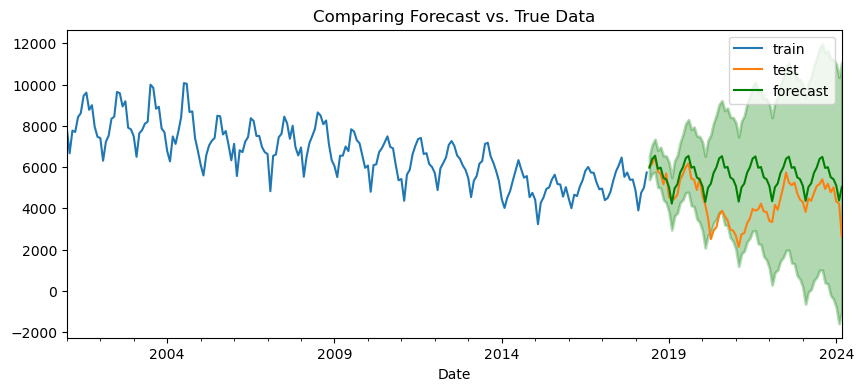

In [69]:
# Use auto_arima parameters to fit an ARIMA
auto_model_theft = tsa.ARIMA(
    train_theft, order=auto_model_theft.order, seasonal_order=auto_model_theft.seasonal_order).fit()

# Obtain forecast as a dataframe with confidence intervals
forecast_df_theft_auto = auto_model_theft.get_forecast(steps=len(test_theft)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train_theft, test_theft, forecast_df_theft_auto);
# Obtain metrics
regression_metrics_ts(test_theft, forecast_df_theft_auto['mean'])

In [70]:
# These are the parameters of our final model
# Orders for non seasonal components
p = 2  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 0  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 2  # Seasonal MA
m = 12 # Seasonal period

final_model_theft = tsa.ARIMA(df_frcst['THEFT'], order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

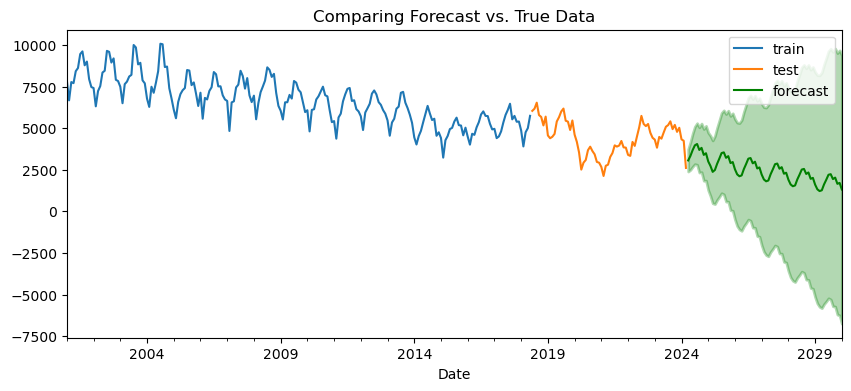

In [71]:
# Obtain future forecasts beyond test data
forecast_df_theft = final_model_theft.get_forecast(len(test_theft)).summary_frame()
plot_forecast(train_theft,test_theft,forecast_df_theft);

In [72]:
# Summarize the forecast

starting_value_theft = forecast_df_theft['mean'].iloc[0]
final_value_theft = forecast_df_theft['mean'].iloc[-1]
change_theft = final_value_theft - starting_value_theft
change_theft

-1745.774879262392

- An decrease of ~1745 cases were recorded from 2000 to 2023 and estimated from then until 2029

In [73]:
perc_change_theft = (change_theft / starting_value_theft) * 100
perc_change_theft

-57.074767195556575

- There is a 57.07% decrease in the number of theft cases from 01/2000 to 09/2023 and estimated from then until 2029

***OBSERVATIONS:***

- The best model as suggested by auto_arima has been used.
- The MPAE improved a lot after determining the best model; however, there is still a large room for improvement.
- Looking at the forecast charts, the trend of the forecast makes sense considering the trend of the original data.

# ***Description of the Forecasted Time-Series***

1) Of the two crimes, which is forecasted to have the highest monthly count of crimes at the end of the forecast?

In [74]:
print (f" The final case counts for narcotics and theft are {final_value_narc:.2f} and {final_value_theft:.2f}, respectively. Hence, theft cases are predicted \n to grow more than narcotics cases.")

 The final case counts for narcotics and theft are -102.45 and 1312.98, respectively. Hence, theft cases are predicted 
 to grow more than narcotics cases.


2. Of the two crimes, which is forecasted to have the highest net change by the end of the forecast?

In [75]:
print (f" Of the two, narcotics cases decreases more with {change_narc:.2f}, while theft cases have {change_theft:.2f}.")

 Of the two, narcotics cases decreases more with -350.89, while theft cases have -1745.77.


3. Of the two crimes, which is forecasted to have the highest percent change by the end of the forecast?

In [76]:
print (f" Of the two, narcotics cases have the higher percent change with {perc_change_narc:.2f}%, while theft cases have {perc_change_theft:.2f}%.")

 Of the two, narcotics cases have the higher percent change with -141.24%, while theft cases have -57.07%.


# ***Recommendations***

- As the forecasted data suggests lower crimes on both narcotics and theft cases, the stakeholders can allot resources more to other crimes high-case crimes.
- This, however, should not mean that stakeholders can loosen their watch on the said two cases.